In [ ]:
import timm 
from fastai.vision.all import * 
from pathlib import Path

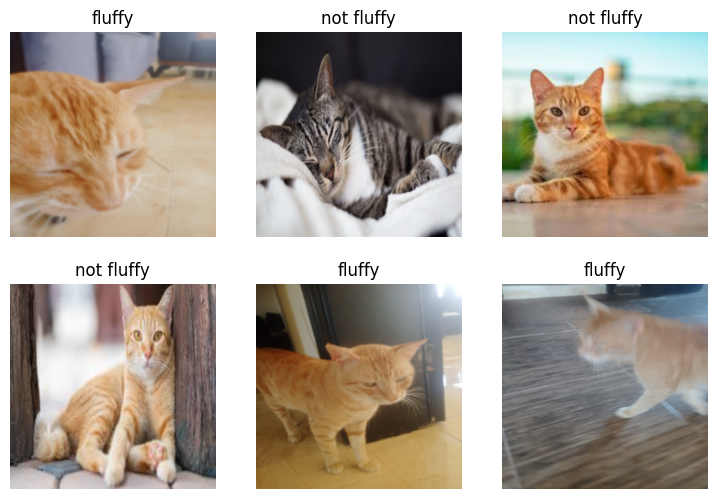

In [11]:
path = Path('fluffy or not')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(224, method='squish')]
).dataloaders(path, bs=6)
dls.show_batch(max_n=6)

In [ ]:
control_learn = vision_learner(dls, 'levit_192', metrics=error_rate, pretrained=True, pretrained_cfg=None, img_size=224)
control_learn.fine_tune(3)

In [4]:
accuracy_learn = vision_learner(
    dls, 
    'beit_base_patch16_224',  # smaller model than 'beit_large_patch16_512'
    metrics=error_rate, 
    pretrained=True, 
    pretrained_cfg=None, 
    img_size=224
)
accuracy_learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.200190,0.085151,0.000000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.248595,0.017972,0.000000,00:05
1,0.163321,0.006299,0.000000,00:05
2,0.120323,0.007245,0.000000,00:05


In [15]:
accuracy_learn.export('accuracy5.pkl')

In [20]:
speed_learn = vision_learner(dls, 'levit_128s', metrics=error_rate, pretrained=True, pretrained_cfg=None, img_size=224)
speed_learn.fine_tune(3)
speed_learn.export('speed_learn.pkl')

Unexpected keys (head.bn.bias, head.bn.num_batches_tracked, head.bn.running_mean, head.bn.running_var, head.bn.weight, head_dist.bn.bias, head_dist.bn.num_batches_tracked, head_dist.bn.running_mean, head_dist.bn.running_var, head_dist.bn.weight) found while loading pretrained weights. This may be expected if model is being adapted.


epoch,train_loss,valid_loss,error_rate,time
0,1.227650,1.599822,0.500000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.777380,0.583776,0.375000,00:04
1,0.676764,0.261099,0.000000,00:04
2,0.567334,0.231872,0.125000,00:05


In [21]:
accuracy_learn_loaded = load_learner('accuracy5.pkl')
control_learn_loaded = load_learner('control.pkl')
speed_learn_loaded = load_learner('speed_learn.pkl')

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


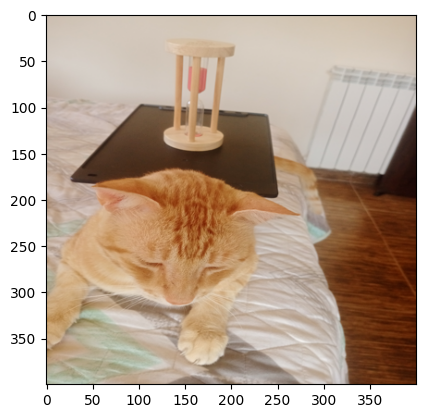

Control: fluffy, 76.2% sure, 65.83 ms
Accuracy: fluffy, 90.91% sure, 170.16 ms
Speed: fluffy, 93.56% sure, 42.95 ms


In [28]:
from PIL import Image
import time
import matplotlib.pyplot as plt

# Open image and display it
img = Image.open('fluffytable.jpg').resize((400, 400))
plt.imshow(img)
plt.show()

# Predict and measure time
start_time = time.time()
classification_control, _, probs_control = control_learn_loaded.predict(img)
end_time = time.time()
control_time = (end_time - start_time) * 1000

start_time = time.time()
classification_accuracy, _, probs_accuracy = accuracy_learn_loaded.predict(img)
end_time = time.time()
accuracy_time = (end_time - start_time) * 1000

start_time = time.time()
classification_speed, _, probs_speed = speed_learn_loaded.predict(img)
end_time = time.time()
speed_time = (end_time - start_time) * 1000

probs_control *= 100
probs_accuracy *= 100
probs_speed *= 100

print(f"Control: {classification_control}, {probs_control[0]:.4}% sure, {control_time:.2f} ms")
print(f"Accuracy: {classification_accuracy}, {probs_accuracy[0]:.4}% sure, {accuracy_time:.2f} ms")
print(f"Speed: {classification_speed}, {probs_speed[0]:.4}% sure, {speed_time:.2f} ms")